<center><h1>Possibility of Repeatative Blood Donation</h1></center>

<img src="donate.jpg" height=30px>

<h4>About  the Project:</h4>
<br>

<p style="text-indent:5em">One of the interesting aspects about blood is that it is not a typical commodity. First, there is the perishable nature of blood. Grocery stores face the dilemma of perishable products such as milk, which can be challenging to predict accurately so as to not lose sales due to expiration. Blood has a shelf life of approximately 42 days according to the American Red Cross (Darwiche, Feuilloy et al. 2010). However, what makes this problem more challenging than milk is the stochastic behavior of blood supply to the system as compared to the more deterministic nature of milk supply. Whole blood is often split into platelets, red blood cells, and plasma, each having their own storage requirements and shelf life. For example, platelets must be stored around 22 degrees Celsius, while red blood cells 4 degree Celsius, and plasma at -25 degrees Celsius. Moreover, platelets can often be stored for at most 5 days, red blood cells up to 42 days, and plasma up to a calendar year.</p>

<p style="text-indent:5em">Amazingly, only around 5% of the eligible donor population actually donate (Linden, Gregorio et al. 1988, Katsaliaki 2008). This low percentage highlights the risk humans are faced with today as blood and blood products are forecasted to increase year-on-year. This is likely why so many researchers continue to try to understand the social and behavioral drivers for why people donate to begin with. The primary way to satisfy demand is to have regularly occurring donations from healthy volunteers.</p>


<h3>Aim Of Project:</h3>
<p style="text-indent:5em">
To build a model which can identify who is likely to donate blood again.



<br>
<h4>Models implemented:</h4>

<ul>
<li>Logistic Regression</li>
<li>Suport Vector Machine</li>
<li>Random Forest</li>
<li>Decision Tree</li>
<li>MLP Classifier</li>
</ul>

### Importing the library

In [120]:
#importing library for reading, writing and perform basic operations
import pandas as pd
import numpy as np

#Importing library for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing library for splitting model into train and test and for data transformation
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score

In [121]:
#Filter the unwanted warning
import warnings
warnings.simplefilter("ignore")

In [122]:
#Importing all the required model for model comparision
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC

### Reading the Data

In [123]:
train=pd.read_csv("blood-train.csv")
test=pd.read_csv("blood-test.csv")

In [124]:
#Printing the train and test size
print("Train Shape : ",train.shape)
print("Test Shape : ",test.shape)

Train Shape :  (576, 6)
Test Shape :  (200, 5)


In [125]:
#Printing first five rows of data
train.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [126]:
#Counting the number of people who donated and not donated
train["Made Donation in March 2007"].value_counts()

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

In [127]:
#Storing dependent variable in Y
Y=train.iloc[:,-1]
Y.head()

0    1
1    1
2    1
3    1
4    0
Name: Made Donation in March 2007, dtype: int64

In [128]:
#Printing last 5 rows
train.tail()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


In [129]:
#Removing Unnamed: 0 columns
old_train=train
train=train.iloc[:,1:5]
test=test.iloc[:,1:5]

In [130]:
#Printing firsr  rows
train.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [131]:
#Merging both train and test data
df=pd.merge(train,test)

In [132]:
df.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,2,500,4
1,2,2,500,4
2,2,2,500,4
3,2,2,500,4
4,2,2,500,4


In [133]:
#Setting the independent variable and dependent variable
X=df.iloc[:,:]
X.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,2,500,4
1,2,2,500,4
2,2,2,500,4
3,2,2,500,4
4,2,2,500,4


### Data Exploration

In [134]:
# Statistics of the data
train.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
count,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347
std,8.175454,5.740010,1435.002556,24.227672
min,0.000000,1.000000,250.000000,2.000000
25%,2.000000,2.000000,500.000000,16.000000
50%,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,49.250000
max,74.000000,50.000000,12500.000000,98.000000


<AxesSubplot: ylabel='Months since Last Donation'>

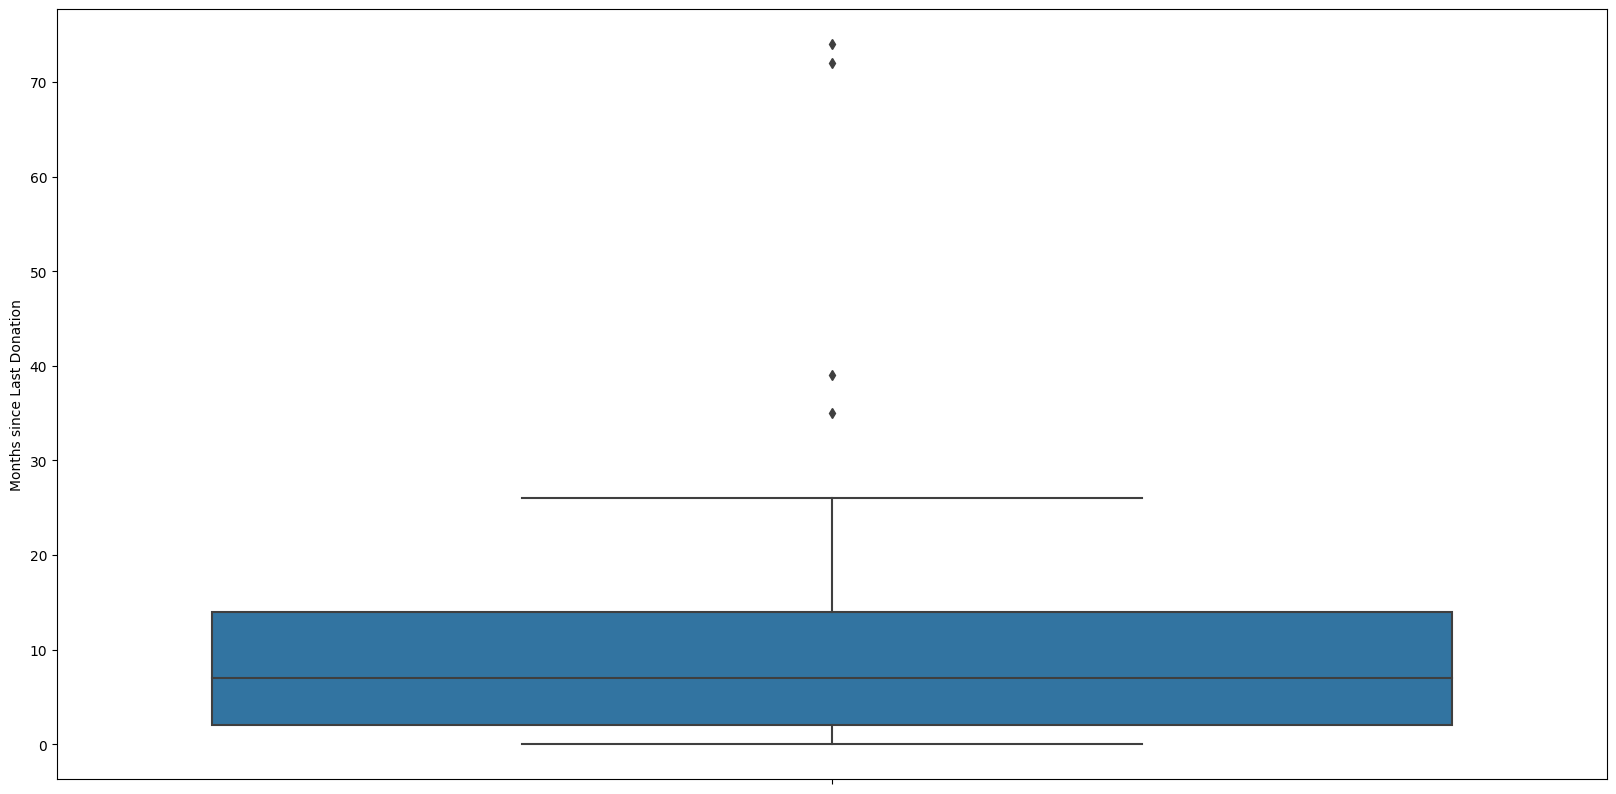

In [135]:
#Boxplot for Months since Last Donation
plt.figure(figsize=(20,10)) 
sns.boxplot(y="Months since Last Donation",data=old_train)

We see from the above boxplot that the maximum people have donated blood in nearby 10 months.

<AxesSubplot: >

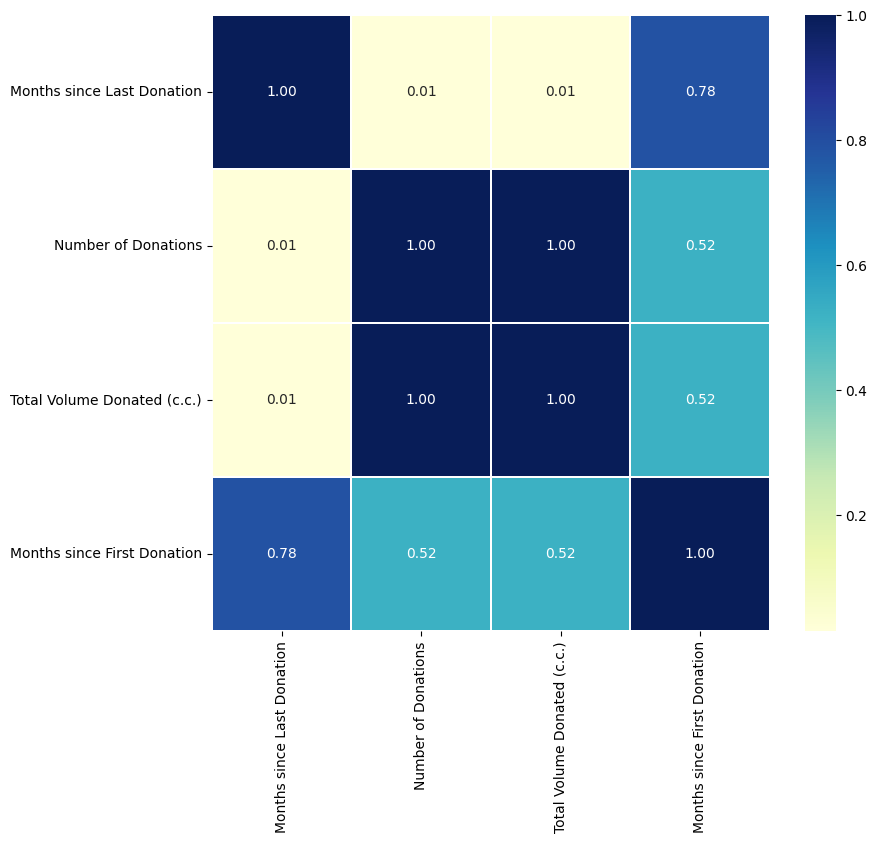

In [137]:
#Correlation between all variables [Checking how different variable are related]
corrmat=X.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,fmt = ".2f",annot=True) 

In [138]:
#Printing all unique value for Month Since Last donation
train["Months since Last Donation"].unique()


array([ 2,  0,  1,  4,  5,  3, 12,  6, 11,  9, 10, 13, 14,  8,  7, 16, 23,
       21, 18, 22, 26, 35, 74, 15, 20, 17, 25, 39, 72], dtype=int64)

### Feature Engineering

Volume donated is also a good feature to know wether the donor will donate or not.

In [139]:
#Creating new variable for calculating how many times a person have donated
X["Donating for"] = (X["Months since First Donation"] - X["Months since Last Donation"])

In [140]:
#Seeing first five rows of the DataFrame
X.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Donating for
0,2,2,500,4,2
1,2,2,500,4,2
2,2,2,500,4,2
3,2,2,500,4,2
4,2,2,500,4,2


<AxesSubplot: >

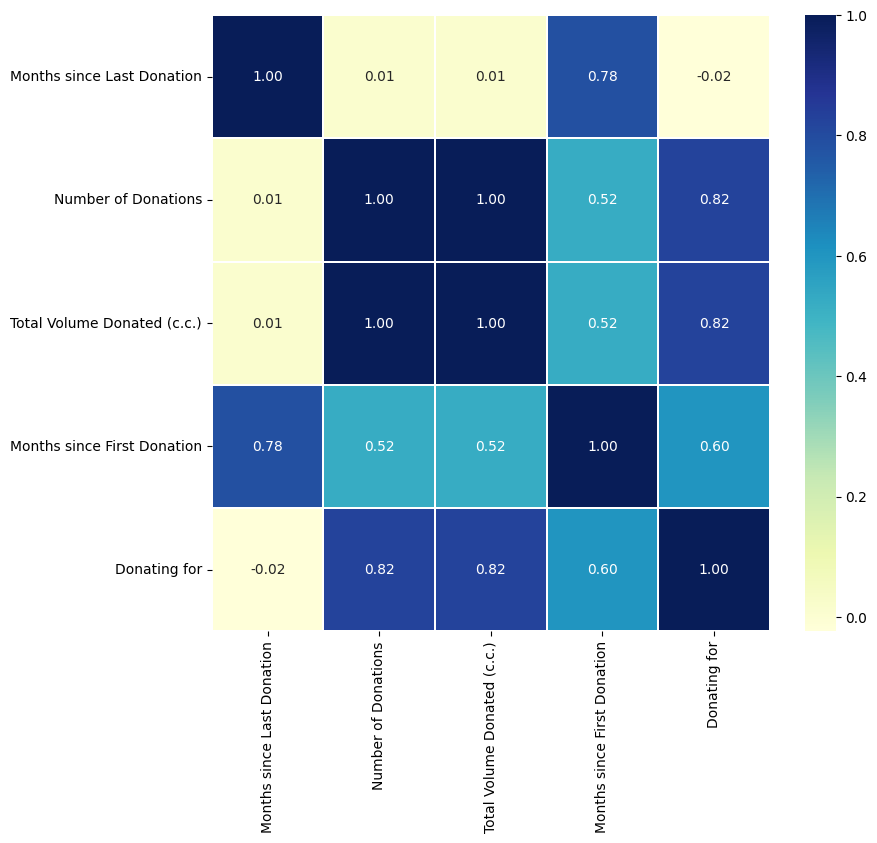

In [141]:
#Correlation between all variables
corrmat=X.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,fmt = ".2f",annot=True) 

Since Total Volume Donated (c.c.) have the very high correlation with other variables so we are dropping the variable.

In [142]:
#Dropping the unnecessary column
X.drop([ 'Total Volume Donated (c.c.)'], axis=1, inplace=True)

In [143]:
X.head()

,Months since Last Donation,Number of Donations,Months since First Donation,Donating for
0,2,2,4,2
1,2,2,4,2
2,2,2,4,2
3,2,2,4,2
4,2,2,4,2


In [144]:
#Shape of independent variable
X.shape

(810, 4)

### Feature Transformation

In [145]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

#Fitting and transforming data
X=scale.fit_transform(X)

In [146]:
train=X[:576]

In [147]:
train.shape

(576, 4)

In [148]:
test=X[576:]

In [149]:
Y=Y[:576]

In [150]:
Y.shape

(576,)

### Model Building

In [151]:
#Splitting into train and test set
xtrain,xtest,ytrain,ytest=train_test_split(train,Y,test_size=0.2,random_state=0)

### <center><u>StepsTo Follow
</u>
    <br><br>
<ul style="margin-left:40%">
    <li>Create the object</li>
    <li>Do the necessary hyperparameter tuning</li>
    <li>Fit the model</li>
    <li>Predict the test set</li>
    <li>Compute roc_auc_score</li>
    <li>Repeat above step for all model</li>
    <li>Compare roc_auc_Score of all model and choose the best model</li>
</ul>
</center>
<br><br>

## Logistic regression

    
<img src="logis.png">
  


In [152]:
#Building the model
logreg = LogisticRegression(random_state=7)
#Fitting the model
logreg.fit(xtrain,ytrain)

LogisticRegression(random_state=7)

In [153]:
#Predicting on the test data
pred=logreg.predict(xtest)

In [154]:
accuracy_score(pred,ytest)

0.7155172413793104

In [155]:
#Printing the roc_auc_score
roc_auc_score(pred,ytest)

0.7321428571428571

## Support Vector Machine
 
    
<img src="sv.jpg" height=100px >


In [156]:
### SVC classifier
SVMC = SVC(probability=True)
#Fitting the model
SVMC.fit(train,Y)

SVC(probability=True)

In [157]:
#Predicting on the test data
pred=SVMC.predict(xtest)

In [158]:
accuracy_score(pred, ytest)

0.7844827586206896

In [159]:
#Printing the confusion matrix
confusion_matrix(pred,ytest)

array([[80, 24],
       [ 1, 11]], dtype=int64)

In [160]:
#Printing the roc auc score
roc_auc_score(pred,ytest)

0.8429487179487177

## Random Forest


<br>
<img src="rf.png">
<br>

In [161]:
#Buildin the model
RFC = RandomForestClassifier()
#Fitting the model
RFC.fit(xtrain,ytrain)

RandomForestClassifier()

In [162]:
#Predicting the test data result
pred=RFC.predict(xtest)

In [163]:
#Printing the confusion matrix
confusion_matrix(pred,ytest)

array([[79, 27],
       [ 2,  8]], dtype=int64)

In [164]:
accuracy_score(pred, ytest)

0.75

In [165]:
#Printingthe roc auc score
roc_auc_score(pred,ytest)

0.7726415094339623

## Decision Tree


<img src="dtree.png">

In [166]:
#Building the model
model=DecisionTreeClassifier(max_leaf_nodes=4,max_features=3,max_depth=15)

In [167]:
#Fitting the model
model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=15, max_features=3, max_leaf_nodes=4)

In [168]:
#Predicting the test data
pred=model.predict(xtest)

In [169]:
accuracy_score(pred, ytest)

0.7327586206896551

In [170]:
#printing the confusion matrix
confusion_matrix(pred,ytest)

array([[80, 30],
       [ 1,  5]], dtype=int64)

In [171]:
#Printing accuracy score
accuracy_score(pred,ytest)

0.7327586206896551

In [172]:
#Printing roc auc score
roc_auc_score(pred,ytest)

0.7803030303030304

## MLP Classifier


<img src="mlp.png">

In [173]:
#Building the Model
clf_neural = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(25,),random_state=1)
clf_neural.fit(train, Y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(25,), random_state=1,
              solver='lbfgs')

In [174]:
#Predicting from the fitted model on test data
print('Predicting...\nIn Test Data')
predicted = clf_neural.predict(xtest)

Predicting...
In Test Data


In [175]:
#printing confusion matrix
confusion_matrix(predicted,ytest)

array([[80, 24],
       [ 1, 11]], dtype=int64)

In [176]:
#Printing roc auc score
roc_auc_score(pred,ytest)

0.7803030303030304

In [177]:
accuracy_score(pred, ytest)

0.7327586206896551